In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers
from tensorflow.keras.utils import to_categorical

In [2]:
train = pd.read_csv('C:/Users/jagad/Downloads/LP-IV-datasets/LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
test = pd.read_csv('C:/Users/jagad/Downloads/LP-IV-datasets/LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

In [3]:
x_train = train.drop('label',axis=1).values
x_test = test.drop('label',axis=1).values

shape = x_train.shape[1]

x_train = x_train.reshape(-1,shape)
x_test = x_test.reshape(-1,shape)

x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
y_train = train['label'].values
y_test = test['label'].values

In [5]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [6]:
print("x_train shape : "+str(x_train.shape))
print("y_train shape : "+str(y_train.shape))
print("x_test shape : "+str(x_test.shape))
print("y_test shape : "+str(y_test.shape))

x_train shape : (50000, 3072)
y_train shape : (50000,)
x_test shape : (10000, 3072)
y_test shape : (10000,)


In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
model = models.Sequential()

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train,y_train, epochs=11, validation_data=(x_test,y_test))

Epoch 1/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2609 - loss: 2.0155 - val_accuracy: 0.3587 - val_loss: 1.7586
Epoch 2/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3760 - loss: 1.7278 - val_accuracy: 0.4175 - val_loss: 1.6401
Epoch 3/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4080 - loss: 1.6466 - val_accuracy: 0.4352 - val_loss: 1.5895
Epoch 4/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4258 - loss: 1.5994 - val_accuracy: 0.4297 - val_loss: 1.5901
Epoch 5/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4436 - loss: 1.5598 - val_accuracy: 0.4370 - val_loss: 1.5694
Epoch 6/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4463 - loss: 1.5466 - val_accuracy: 0.4587 - val_loss: 1.5269
Epoch 7/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4520 - loss: 1.5185 - val_accuracy: 0.4484 - val_loss: 1.5427
Epoch 8/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4591 - loss: 1.51

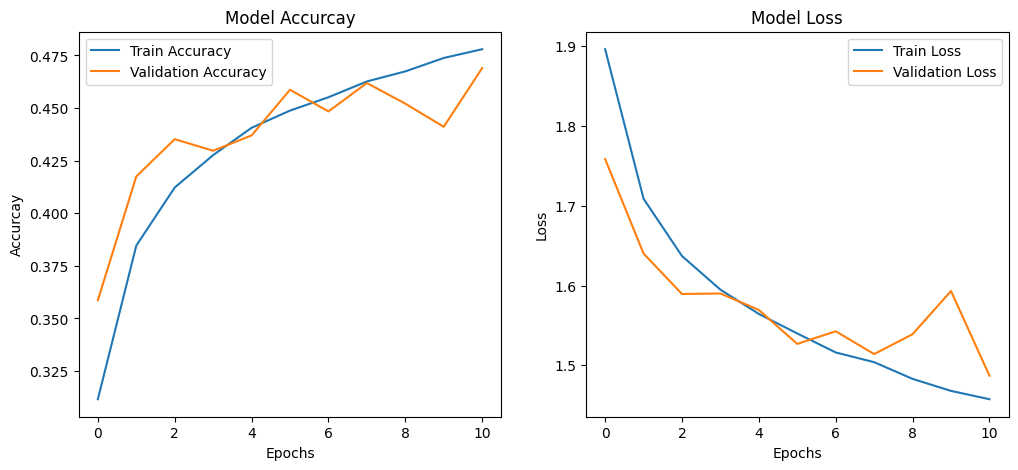

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accurcay')
plt.title('Model Accurcay')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

In [12]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4770 - loss: 1.4754


In [13]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


Actual :  frog
Predicted :  frog


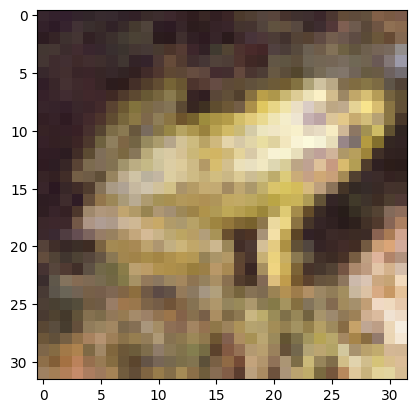

In [15]:
n=19
plt.imshow(x_test[n].reshape(32,32,3))
print('Actual : ',classes[np.argmax(y_test[n])])
print('Predicted : ',classes[np.argmax(y_pred[n])])
plt.show()